In [27]:
import numpy as np
import scipy.stats as st
import pandas as pd

# Dataset
dataNORMAL = pd.read_csv("TotalNormal.csv", usecols=["numbers_wrong_attempt"]).dropna().squeeze()
dataPATTERN = pd.read_csv("TotalMemoryPattern.csv", usecols=["numbers_wrong_attempt"]).dropna().squeeze()
dataSPEED = pd.read_csv("TotalSpeed.csv", usecols=["numbers_wrong_attempt"]).dropna().squeeze()

# Calculate mean
meanNORMAL = np.mean(dataNORMAL)
meanPATTERN = np.mean(dataPATTERN)
meanSPEED = np.mean(dataSPEED)

# 95% Confidence Interval using t-distribution
confidence = 0.95
nNORMAL = len(dataNORMAL)
nPATTERN = len(dataPATTERN)
nSPEED = len(dataSPEED)
stderrNORMAL = st.sem(dataNORMAL)
stderrPATTERN = st.sem(dataPATTERN)
stderrSPEED = st.sem(dataSPEED)
ciNORMAL = st.t.interval(confidence, nNORMAL-1, loc=meanNORMAL, scale=stderrNORMAL)
ciPATTERN = st.t.interval(confidence, nPATTERN-1, loc=meanPATTERN, scale=stderrPATTERN)
ciSPEED = st.t.interval(confidence, nSPEED-1, loc=meanSPEED, scale=stderrSPEED)

print("Mean NORMAL:", meanNORMAL)
print("95% Confidence Interval NORMAL:", ciNORMAL)
print("Mean PATTERN:", meanPATTERN)
print("95% Confidence Interval PATTERN:", ciPATTERN)
print("Mean SPEED:", meanSPEED)
print("95% Confidence Interval SPEED:", ciSPEED)

# All data together
combined_data = pd.concat([dataNORMAL, dataPATTERN, dataSPEED], ignore_index=True)

#Calculate mean
meanCombined = np.mean(combined_data)

# 95% Confidence Interval using t-distribution
nCombined_data = len(combined_data)
stderrCombined_data = st.sem(combined_data)
ciCombinedData = st.t.interval(confidence, nCombined_data-1, loc=meanCombined,scale = stderrCombined_data)

print("Mean Combined:", meanCombined)
print("95% Confidence Interval Combined:", ciCombinedData)


Mean NORMAL: 6.314285714285714
95% Confidence Interval NORMAL: (np.float64(5.809074796466243), np.float64(6.819496632105185))
Mean PATTERN: 6.6
95% Confidence Interval PATTERN: (np.float64(5.8277598701332405), np.float64(7.372240129866759))
Mean SPEED: 5.9
95% Confidence Interval SPEED: (np.float64(5.329851696515699), np.float64(6.470148303484302))
Mean Combined: 6.166666666666667
95% Confidence Interval Combined: (np.float64(5.81334558547058), np.float64(6.519987747862754))


In [20]:
# Datapath (load as numeric Series)
import pandas as pd
import numpy as np

# Ensure 1D integer Series for plotting
first_normal = pd.read_csv("TotalNormal.csv", usecols=["first_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
last_normal = pd.read_csv("TotalNormal.csv", usecols=["last_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
first_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["first_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
last_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["last_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
first_speed = pd.read_csv("TotalSpeed.csv", usecols=["first_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)
last_speed = pd.read_csv("TotalSpeed.csv", usecols=["last_wrong_attempt"]).squeeze("columns").astype('Int64').dropna().astype(int)

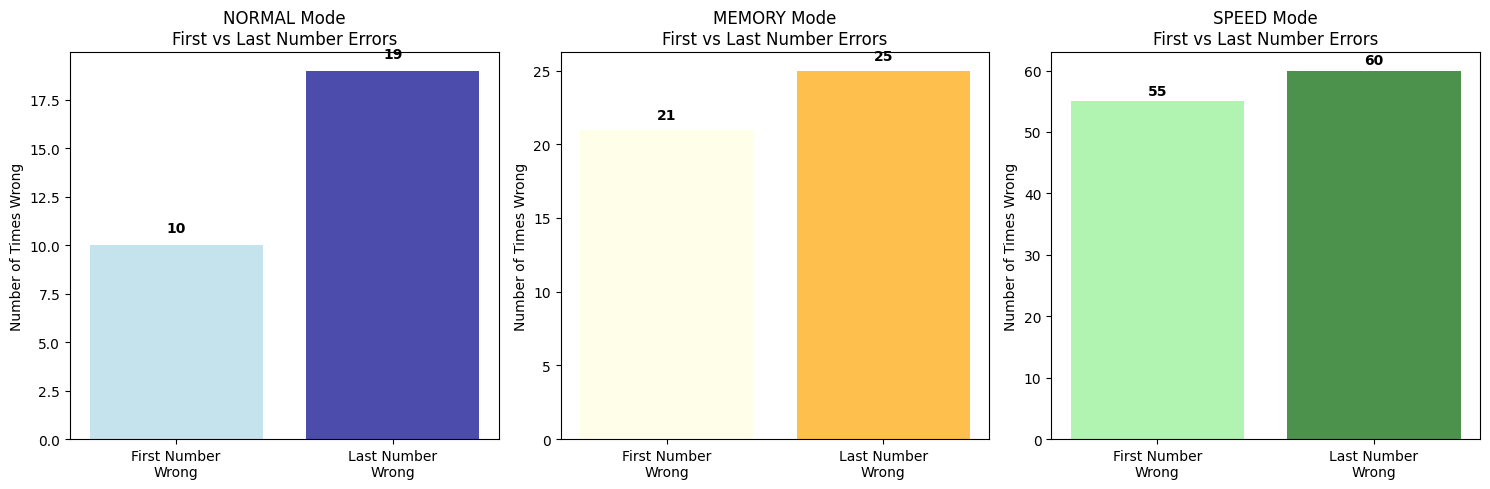

FIRST vs LAST NUMBER ERROR COUNTS:
----------------------------------------
NORMAL:  First wrong: 10, Last wrong: 19
MEMORY:  First wrong: 21, Last wrong: 25
SPEED:   First wrong: 55, Last wrong: 60

Total attempts per mode:
NORMAL:  35 attempts
MEMORY:  25 attempts
SPEED:   60 attempts


In [21]:
# CORRECTED: Count of First vs Last Number Errors by Game Mode
import matplotlib.pyplot as plt
import numpy as np

# Count how many times first number was wrong (sum of 1s)
first_normal_count = first_normal.sum()  # Total times first number was wrong
last_normal_count = last_normal.sum()    # Total times last number was wrong

first_memory_count = first_memory.sum()  # Total times first number was wrong  
last_memory_count = last_memory.sum()    # Total times last number was wrong

first_speed_count = first_speed.sum()    # Total times first number was wrong
last_speed_count = last_speed.sum()      # Total times last number was wrong

# Create comparison bar chart
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# NORMAL comparison
categories = ['First Number\nWrong', 'Last Number\nWrong']
normal_counts = [first_normal_count, last_normal_count]
ax1.bar(categories, normal_counts, color=['lightblue', 'darkblue'], alpha=0.7)
ax1.set_title('NORMAL Mode\nFirst vs Last Number Errors')
ax1.set_ylabel('Number of Times Wrong')
for i, v in enumerate(normal_counts):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# MEMORY comparison  
memory_counts = [first_memory_count, last_memory_count]
ax2.bar(categories, memory_counts, color=['lightyellow', 'orange'], alpha=0.7)
ax2.set_title('MEMORY Mode\nFirst vs Last Number Errors')
ax2.set_ylabel('Number of Times Wrong')
for i, v in enumerate(memory_counts):
    ax2.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# SPEED comparison
speed_counts = [first_speed_count, last_speed_count]
ax3.bar(categories, speed_counts, color=['lightgreen', 'darkgreen'], alpha=0.7)
ax3.set_title('SPEED Mode\nFirst vs Last Number Errors')
ax3.set_ylabel('Number of Times Wrong')
for i, v in enumerate(speed_counts):
    ax3.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("FIRST vs LAST NUMBER ERROR COUNTS:")
print("-" * 40)
print(f"NORMAL:  First wrong: {first_normal_count}, Last wrong: {last_normal_count}")
print(f"MEMORY:  First wrong: {first_memory_count}, Last wrong: {last_memory_count}")  
print(f"SPEED:   First wrong: {first_speed_count}, Last wrong: {last_speed_count}")
print(f"\nTotal attempts per mode:")
print(f"NORMAL:  {len(first_normal)} attempts")
print(f"MEMORY:  {len(first_memory)} attempts")
print(f"SPEED:   {len(first_speed)} attempts")

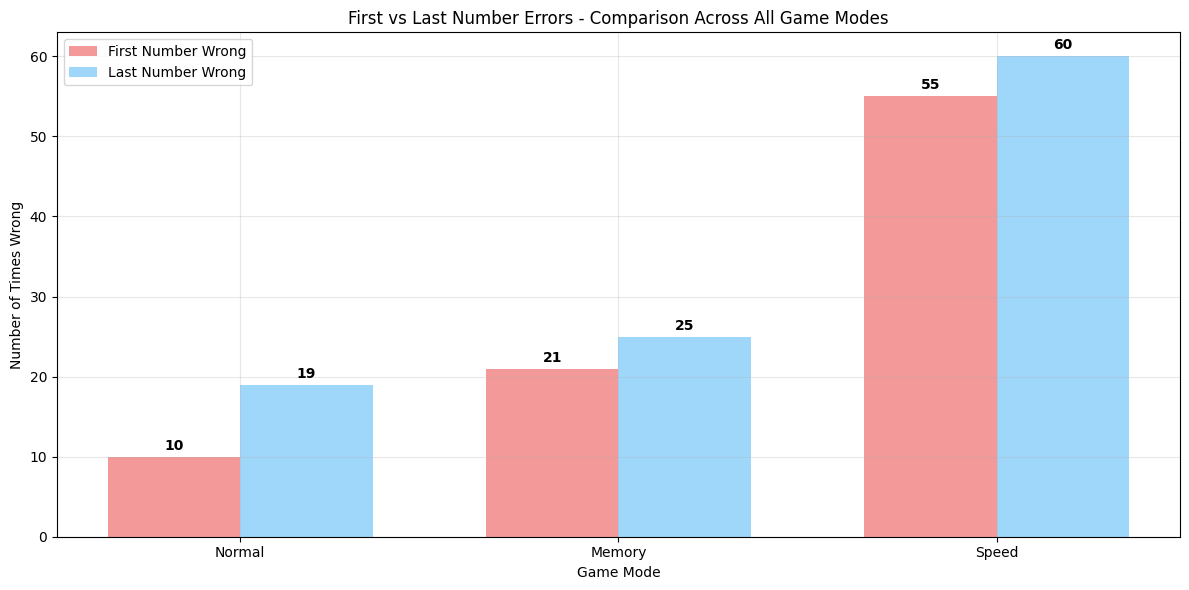


PERCENTAGE ANALYSIS:
----------------------------------------
Normal:
  First number wrong: 10/35 (28.6%)
  Last number wrong:  19/35 (54.3%)

Memory:
  First number wrong: 21/25 (84.0%)
  Last number wrong:  25/25 (100.0%)

Speed:
  First number wrong: 55/60 (91.7%)
  Last number wrong:  60/60 (100.0%)



In [22]:
# OVERALL COMPARISON: All game modes side by side
fig, ax = plt.subplots(figsize=(12, 6))

# Data for grouped bar chart
game_modes = ['Normal', 'Memory', 'Speed']
first_errors = [first_normal_count, first_memory_count, first_speed_count]
last_errors = [last_normal_count, last_memory_count, last_speed_count]

x = np.arange(len(game_modes))
width = 0.35

# Create grouped bars
bars1 = ax.bar(x - width/2, first_errors, width, label='First Number Wrong', 
               color='lightcoral', alpha=0.8)
bars2 = ax.bar(x + width/2, last_errors, width, label='Last Number Wrong', 
               color='lightskyblue', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Game Mode')
ax.set_ylabel('Number of Times Wrong')
ax.set_title('First vs Last Number Errors - Comparison Across All Game Modes')
ax.set_xticks(x)
ax.set_xticklabels(game_modes)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
               f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate percentages
print("\nPERCENTAGE ANALYSIS:")
print("-" * 40)
for i, mode in enumerate(game_modes):
    total_attempts = [len(first_normal), len(first_memory), len(first_speed)][i]
    first_pct = (first_errors[i] / total_attempts) * 100
    last_pct = (last_errors[i] / total_attempts) * 100
    print(f"{mode}:")
    print(f"  First number wrong: {first_errors[i]}/{total_attempts} ({first_pct:.1f}%)")
    print(f"  Last number wrong:  {last_errors[i]}/{total_attempts} ({last_pct:.1f}%)")
    print()

In [23]:
# DETAILED BREAKDOWN: Individual game mode analysis
print("DETAILED ERROR BREAKDOWN BY GAME MODE:")
print("=" * 50)

# Function to analyze a game mode
def analyze_mode(first_data, last_data, mode_name):
    total_attempts = len(first_data)
    first_wrong_count = first_data.sum()
    last_wrong_count = last_data.sum()
    
    print(f"\n{mode_name} Mode:")
    print(f"  Total attempts: {total_attempts}")
    print(f"  First number wrong: {first_wrong_count} times ({(first_wrong_count/total_attempts)*100:.1f}%)")
    print(f"  Last number wrong: {last_wrong_count} times ({(last_wrong_count/total_attempts)*100:.1f}%)")
    
    if first_wrong_count > last_wrong_count:
        diff = first_wrong_count - last_wrong_count
        print(f"  → First number errors are MORE common (+{diff} more errors)")
    elif last_wrong_count > first_wrong_count:
        diff = last_wrong_count - first_wrong_count
        print(f"  → Last number errors are MORE common (+{diff} more errors)")
    else:
        print(f"  → First and last errors occur equally")

# Analyze each mode
analyze_mode(first_normal, last_normal, "NORMAL")
analyze_mode(first_memory, last_memory, "MEMORY") 
analyze_mode(first_speed, last_speed, "SPEED")

print(f"\nKEY INSIGHTS:")
print("-" * 20)
total_first = first_normal_count + first_memory_count + first_speed_count
total_last = last_normal_count + last_memory_count + last_speed_count
print(f"Overall: {total_first} first number errors vs {total_last} last number errors")

DETAILED ERROR BREAKDOWN BY GAME MODE:

NORMAL Mode:
  Total attempts: 35
  First number wrong: 10 times (28.6%)
  Last number wrong: 19 times (54.3%)
  → Last number errors are MORE common (+9 more errors)

MEMORY Mode:
  Total attempts: 25
  First number wrong: 21 times (84.0%)
  Last number wrong: 25 times (100.0%)
  → Last number errors are MORE common (+4 more errors)

SPEED Mode:
  Total attempts: 60
  First number wrong: 55 times (91.7%)
  Last number wrong: 60 times (100.0%)
  → Last number errors are MORE common (+5 more errors)

KEY INSIGHTS:
--------------------
Overall: 86 first number errors vs 104 last number errors


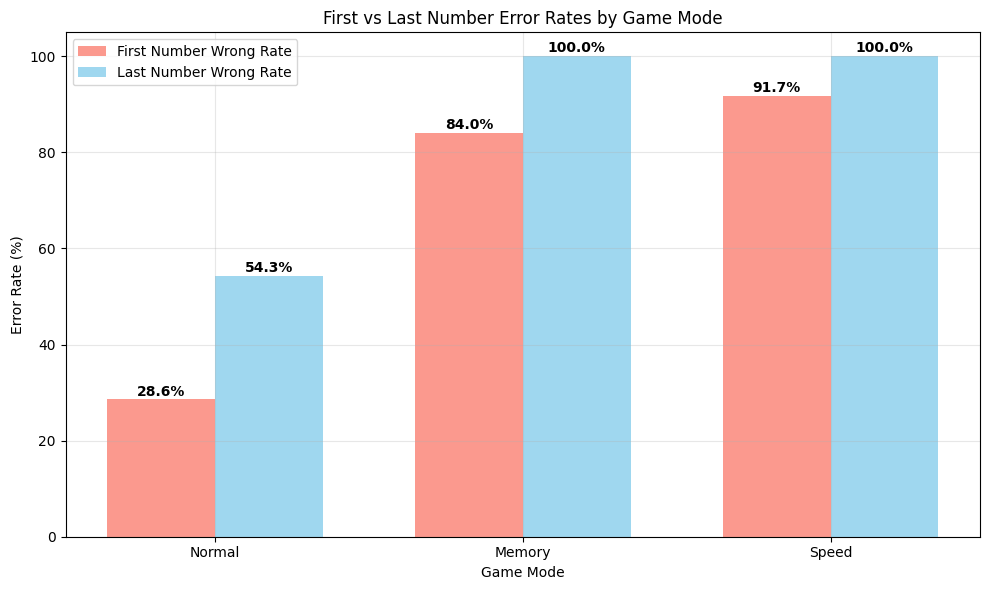

This shows the ERROR RATES (percentages) rather than raw counts


In [24]:
# PERCENTAGE COMPARISON CHART
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate error rates as percentages
game_modes = ['Normal', 'Memory', 'Speed']
total_attempts = [len(first_normal), len(first_memory), len(first_speed)]
first_error_rates = [(first_normal_count/len(first_normal))*100, 
                     (first_memory_count/len(first_memory))*100,
                     (first_speed_count/len(first_speed))*100]
last_error_rates = [(last_normal_count/len(last_normal))*100,
                    (last_memory_count/len(last_memory))*100, 
                    (last_speed_count/len(last_speed))*100]

x = np.arange(len(game_modes))
width = 0.35

# Create percentage bars
bars1 = ax.bar(x - width/2, first_error_rates, width, label='First Number Wrong Rate', 
               color='salmon', alpha=0.8)
bars2 = ax.bar(x + width/2, last_error_rates, width, label='Last Number Wrong Rate', 
               color='skyblue', alpha=0.8)

ax.set_xlabel('Game Mode')
ax.set_ylabel('Error Rate (%)')
ax.set_title('First vs Last Number Error Rates by Game Mode')
ax.set_xticks(x)
ax.set_xticklabels(game_modes)
ax.legend()
ax.grid(True, alpha=0.3)

# Add percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
               f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("This shows the ERROR RATES (percentages) rather than raw counts")

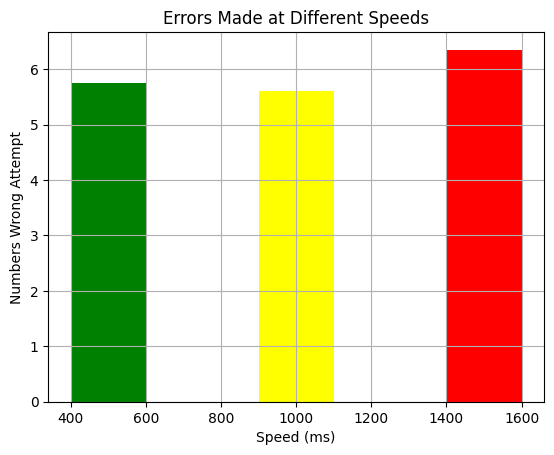

Average mistakes at 500ms: 5.75
Average mistakes at 1000ms: 5.6
Average mistakes at 1500ms: 6.35


In [25]:
#Graph over errors made per speed
import matplotlib.pyplot as plt
data = pd.read_csv("TotalSpeed.csv", usecols=["speed_ms", "numbers_wrong_attempt"]).dropna()


#Errors made on speed 1500ms
dataSPEED = data[data['speed_ms'] == 1500]['numbers_wrong_attempt']

#Errors made on speed 1000ms
dataSPEED = data[data['speed_ms'] == 1000]['numbers_wrong_attempt']

#Errors made on speed 500ms
dataSPEED = data[data['speed_ms'] == 500]['numbers_wrong_attempt']

#Graphing the data: X axis is speed, Y axis is numbers wrong attempt
plt.bar([500, 1000, 1500], [data[data['speed_ms'] == 500]['numbers_wrong_attempt'].mean(),
                             data[data['speed_ms'] == 1000]['numbers_wrong_attempt'].mean(),
                             data[data['speed_ms'] == 1500]['numbers_wrong_attempt'].mean()],
        color=['green', 'yellow', 'red'], width=200)
plt.xlabel('Speed (ms)')
plt.ylabel('Numbers Wrong Attempt')
plt.title('Errors Made at Different Speeds')
plt.grid()
plt.show()

#Numbers of mistake per speed
print("Average mistakes at 500ms:", data[data['speed_ms'] == 500]['numbers_wrong_attempt'].mean())
print("Average mistakes at 1000ms:", data[data['speed_ms'] == 1000]['numbers_wrong_attempt'].mean())
print("Average mistakes at 1500ms:", data[data['speed_ms'] == 1500]['numbers_wrong_attempt'].mean())

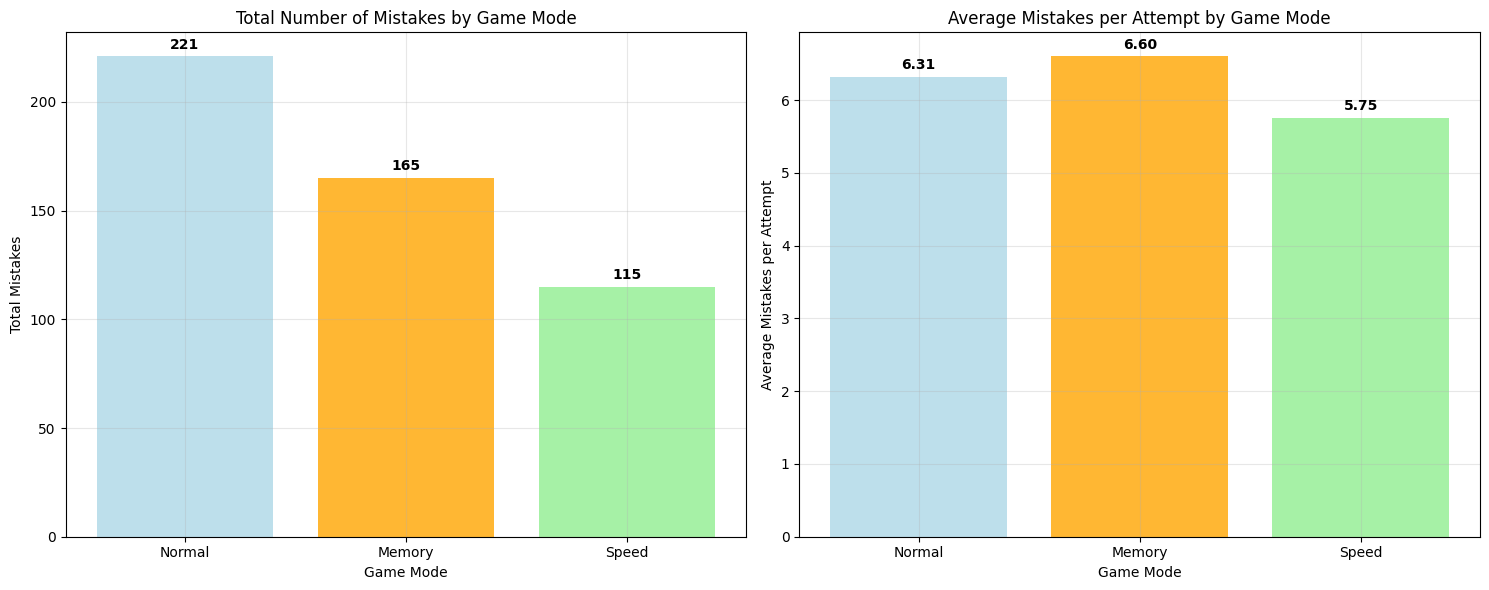

TOTAL MISTAKES COMPARISON:
NORMAL:  221 total mistakes, 6.31 avg per attempt (35 attempts)
MEMORY:  165 total mistakes, 6.60 avg per attempt (25 attempts)
SPEED:   115 total mistakes, 5.75 avg per attempt (20 attempts)

KEY INSIGHTS:
--------------------
Most total mistakes: Normal (221 mistakes)
Least total mistakes: Speed (115 mistakes)
Highest average per attempt: Memory (6.60 mistakes/attempt)
Lowest average per attempt: Speed (5.75 mistakes/attempt)


In [26]:
# TOTAL MISTAKES COMPARISON - Similar format to first/last comparison
import matplotlib.pyplot as plt
import numpy as np

# Calculate total mistakes for each game mode
total_mistakes_normal = dataNORMAL.sum()    # Sum of all mistakes in normal mode
total_mistakes_memory = dataPATTERN.sum()   # Sum of all mistakes in memory mode  
total_mistakes_speed = dataSPEED.sum()      # Sum of all mistakes in speed mode

# Calculate average mistakes per attempt
avg_mistakes_normal = dataNORMAL.mean()
avg_mistakes_memory = dataPATTERN.mean() 
avg_mistakes_speed = dataSPEED.mean()

# Create comparison charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Total Mistakes Count
game_modes = ['Normal', 'Memory', 'Speed']
total_mistakes = [total_mistakes_normal, total_mistakes_memory, total_mistakes_speed]
colors = ['lightblue', 'orange', 'lightgreen']

bars1 = ax1.bar(game_modes, total_mistakes, color=colors, alpha=0.8)
ax1.set_title('Total Number of Mistakes by Game Mode')
ax1.set_ylabel('Total Mistakes')
ax1.set_xlabel('Game Mode')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, total) in enumerate(zip(bars1, total_mistakes)):
    ax1.text(bar.get_x() + bar.get_width()/2., total + max(total_mistakes) * 0.01,
            f'{int(total)}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Average Mistakes per Attempt
avg_mistakes = [avg_mistakes_normal, avg_mistakes_memory, avg_mistakes_speed]

bars2 = ax2.bar(game_modes, avg_mistakes, color=colors, alpha=0.8)
ax2.set_title('Average Mistakes per Attempt by Game Mode')
ax2.set_ylabel('Average Mistakes per Attempt')
ax2.set_xlabel('Game Mode') 
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, avg) in enumerate(zip(bars2, avg_mistakes)):
    ax2.text(bar.get_x() + bar.get_width()/2., avg + max(avg_mistakes) * 0.01,
            f'{avg:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed summary
print("TOTAL MISTAKES COMPARISON:")
print("=" * 50)
print(f"NORMAL:  {total_mistakes_normal} total mistakes, {avg_mistakes_normal:.2f} avg per attempt ({len(dataNORMAL)} attempts)")
print(f"MEMORY:  {total_mistakes_memory} total mistakes, {avg_mistakes_memory:.2f} avg per attempt ({len(dataPATTERN)} attempts)")
print(f"SPEED:   {total_mistakes_speed} total mistakes, {avg_mistakes_speed:.2f} avg per attempt ({len(dataSPEED)} attempts)")

# Find which mode has most/least mistakes
max_total = max(total_mistakes)
min_total = min(total_mistakes)
max_mode = game_modes[total_mistakes.index(max_total)]
min_mode = game_modes[total_mistakes.index(min_total)]

max_avg = max(avg_mistakes)
min_avg = min(avg_mistakes)
max_avg_mode = game_modes[avg_mistakes.index(max_avg)]
min_avg_mode = game_modes[avg_mistakes.index(min_avg)]

print(f"\nKEY INSIGHTS:")
print("-" * 20)
print(f"Most total mistakes: {max_mode} ({int(max_total)} mistakes)")
print(f"Least total mistakes: {min_mode} ({int(min_total)} mistakes)")
print(f"Highest average per attempt: {max_avg_mode} ({max_avg:.2f} mistakes/attempt)")
print(f"Lowest average per attempt: {min_avg_mode} ({min_avg:.2f} mistakes/attempt)")